In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

from pca_functions import *

In [170]:
from matplotlib import rc
rc('text', usetex=False)
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [171]:
parent_dir = '/Users/allybaldelli/Desktop/exo-comets/ProjectExoComet/'
df = pd.read_pickle(parent_dir+'data_file/'+'master_df_final.pkl')

In [172]:
# Drop the columns
try:
    df = df.drop(columns=['MJD-Obs', 'Date-Obs'])

except KeyError as e:
    print(f"columns already dropped")

In [173]:
n_componets = 5
pca, principal_components, scaler, scaled_data = pca_funct(df, n_componets)
estimated_df = pca_estimate(pca, principal_components)
index_list = vaiations(scaled_data, estimated_df, df, 20)


df_reset = df.reset_index(drop=True)
# plt.figure(figsize=(8, 5))
# for index in index_list:
#     plt.plot(df_reset.loc[index], label=index, alpha=0.5)

# plt.legend()

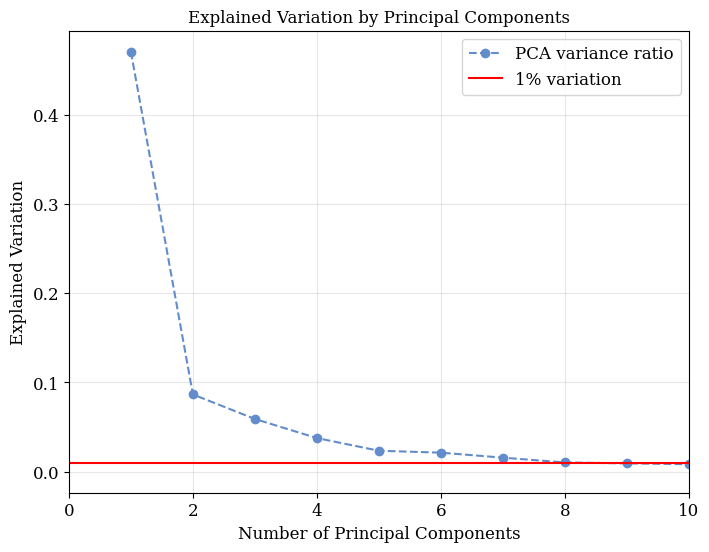

In [174]:
# Get the explained variance ratio
pca_10 = PCA()
pca_10.fit(df)
explained_variance_ratio = pca_10.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', 
         color = colors[-1], label = "PCA variance ratio")
plt.axhline(y=0.01, color='r', linestyle='-', label = "1% variation")
plt.title('Explained Variation by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variation')
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
plt.legend()
plt.show()

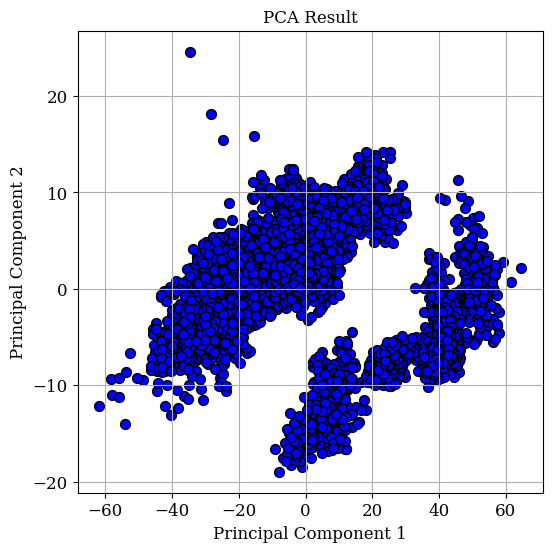

In [175]:
pca_df = pd.DataFrame(data=principal_components, columns=[
                      "PC"+str(i) for i in range(1, n_componets+1)])

# Visualize the results
plt.figure(figsize=(6, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid()
plt.savefig(parent_dir + 'PCA_stuff/' + 'PCA_Results.png')

In [176]:
from sklearn.cluster import HDBSCAN

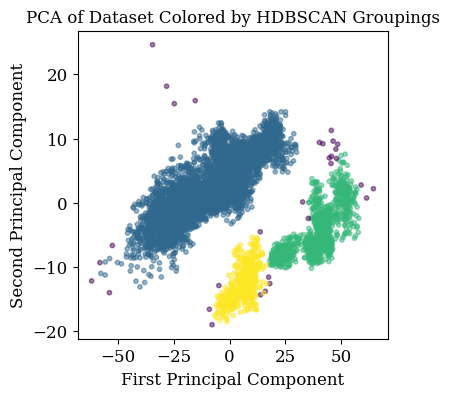

In [177]:

# what happens if left True??
hdb = HDBSCAN(allow_single_cluster=True, cluster_selection_epsilon=1.5)
hdb.fit(principal_components[:, :2])
labels = hdb.labels_

plt.figure(figsize=(4, 4))
scatter = plt.scatter(
    principal_components[:, 0], principal_components[:, 1],
    c=labels, cmap='viridis', s=10, alpha=0.5)
# plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset Colored by HDBSCAN Groupings')
plt.savefig(parent_dir + 'PCA_stuff/' + 'HDBSCAN_clusters.png')

In [178]:
from sklearn.cluster import KMeans

/Users/allybaldelli/opt/anaconda3/envs/exo-coment-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


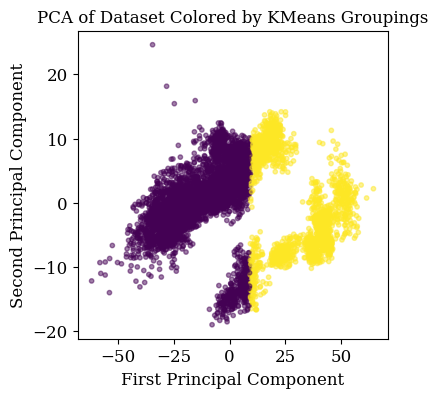

In [179]:

# Assuming principal_components is already defined
n_clusters = 2  # You can set the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=43).fit(
    principal_components[:, :2])

labels = kmeans.labels_

plt.figure(figsize=(4, 4))
scatter = plt.scatter(
    principal_components[:, 0], principal_components[:, 1],
    c=labels, cmap='viridis', s=10, alpha=0.5)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset Colored by KMeans Groupings')
plt.savefig(parent_dir + 'PCA_stuff/' + 'Kmeans_clusters.png')


In [180]:
from sklearn.cluster import DBSCAN

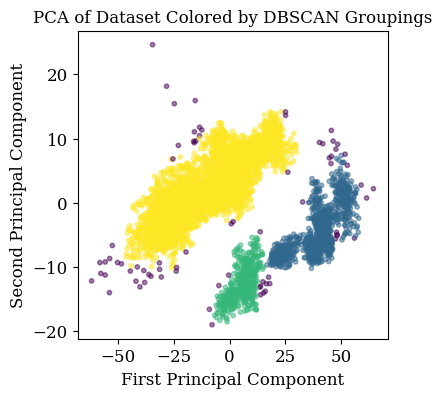

In [181]:
# Assuming principal_components is already defined
n_clusters = 6  # You can set the desired number of clusters
dbscan = DBSCAN(eps=1.5).fit(principal_components[:, :2])

dbscan_labels = dbscan.labels_

plt.figure(figsize=(4, 4))
scatter = plt.scatter(
    principal_components[:, 0], principal_components[:, 1],
    c=dbscan_labels, cmap='viridis', s=10, alpha=0.5)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset Colored by DBSCAN Groupings')
plt.savefig(parent_dir + 'PCA_stuff/' + 'DBSCAN_clusters.png')


6676it [00:05, 1291.77it/s]


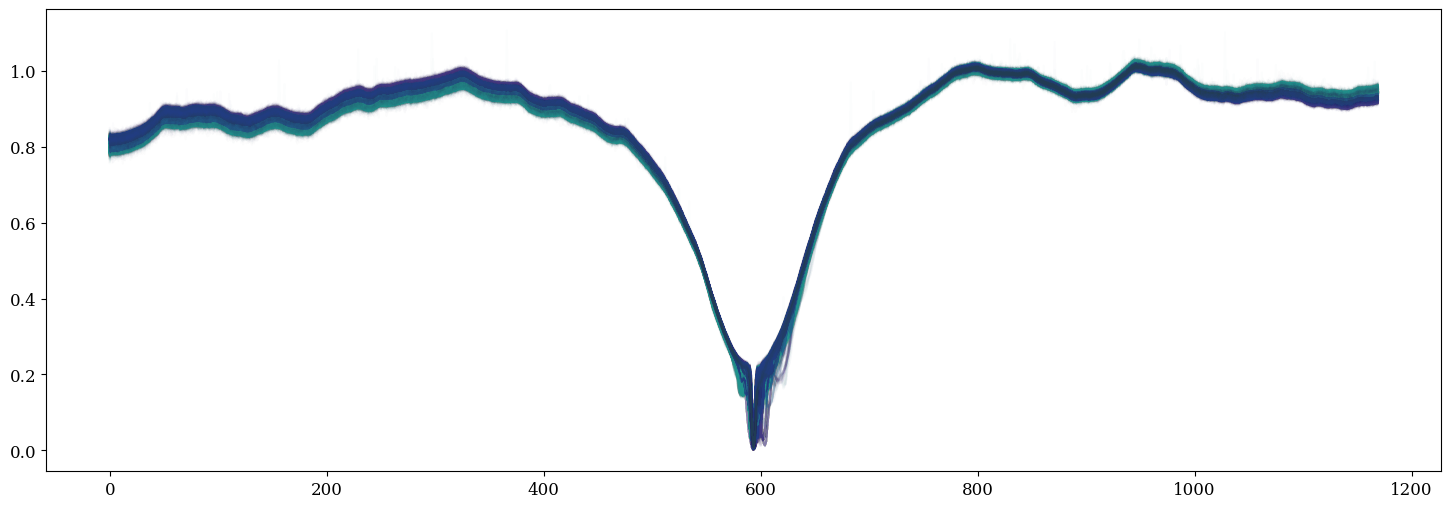

In [182]:
# Create a figure with all the spectra stacked but colorsed
fig, ax = plt.subplots(figsize=(18, 6))

for index, row in tqdm(df_reset.iterrows()):
    label = dbscan_labels[index]
    color = plt.cm.viridis((label + 1) / n_clusters)
    ax.plot(row, alpha=0.01, color=color)

In [183]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,49.630298,1.465440,-3.395761,-7.944827,2.171003
1,52.288435,0.529019,-3.564278,-7.423653,1.819205
2,53.369857,1.390514,-1.777801,-3.135602,3.348075
3,52.827408,1.651101,-1.543966,-3.148242,3.235972
4,49.329151,-0.093872,-2.494007,-4.648467,2.499630


In [184]:
pca_df.to_pickle(parent_dir+'/PCA_stuff/'+'PCA.pkl')

In [185]:
scaler = StandardScaler()
normalized_principal_components = scaler.fit_transform(principal_components)

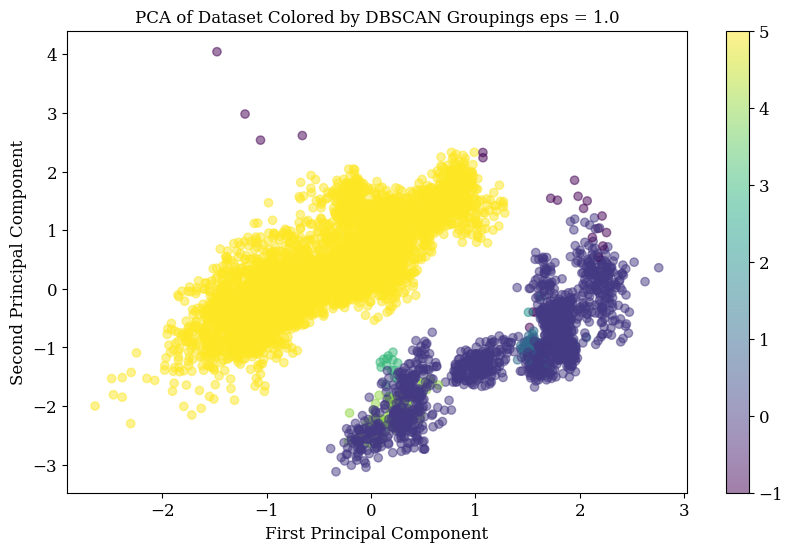

<Figure size 640x480 with 0 Axes>

In [186]:

eps = 1.
dbscan_6PC = DBSCAN(eps=eps).fit(normalized_principal_components)

dbscan_labels_6PC = dbscan_6PC.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(normalized_principal_components[:, 0], normalized_principal_components[:, 1],
                      c=dbscan_labels_6PC, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset Colored by DBSCAN Groupings eps = ' + str(eps))
plt.show()

# # Create a figure with three subplots
# fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# # axes is a list of three Axes objects
# axes_list = [axes[0], axes[1], axes[2], axes[3]]

# n_clusters = max(dbscan_labels_test) + 1
# colors = ["#ca5670", "#72a555", "#ab62c0", "#c57c3c", "#638ccc"]

# for index, row in tqdm(df_reset.iterrows()):
#         label = dbscan_labels_test[index]
#         color =plt.cm.viridis((label + 1)/ n_clusters)
#         axes_list[label].plot(row, alpha=0.5, color = color)

# plt.title('DBSCAN clusters')
plt.savefig(parent_dir + 'PCA_stuff/' + 'DBSCAN_esp1_clusters.png')

## switching to HDBSCAN

In [187]:
colors = ["#bf63b1",
          "#9ead34",
          "#8766d0",
          "#6b9f60",
          "#c65a89",
          "#6697ca",
          "#c37039",
          "#cd5760"]

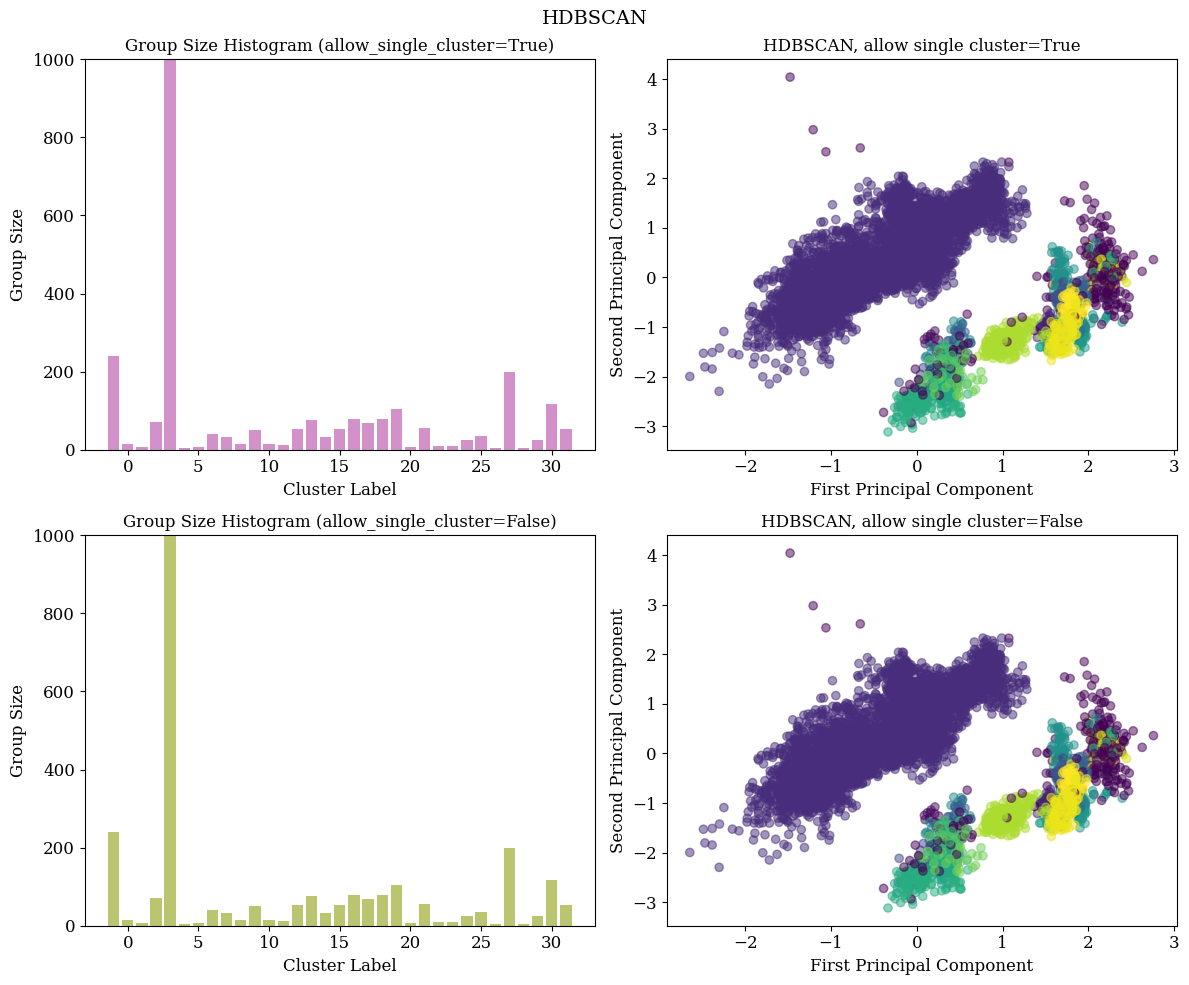

In [188]:


# First HDBSCAN with allow_single_cluster=True
hdbscan_true = HDBSCAN(allow_single_cluster=True).fit(
    normalized_principal_components)
hdbscan_labels_true = hdbscan_true.labels_


# Second HDBSCAN with allow_single_cluster=False
hdbscan_false = HDBSCAN(allow_single_cluster=False).fit(
    normalized_principal_components)
hdbscan_labels_false = hdbscan_false.labels_


# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histogram for allow_single_cluster=True
unique, counts = np.unique(hdbscan_labels_true, return_counts=True)
axes[0, 0].bar(unique, counts, color=colors[0], alpha=0.7)
axes[0, 0].set_xlabel('Cluster Label')
axes[0, 0].set_ylabel('Group Size')
axes[0, 0].set_title('Group Size Histogram (allow_single_cluster=True)')
axes[0, 0].set_ylim(0, 1000)

# Plot scatter for allow_single_cluster=True
axes[0, 1].scatter(normalized_principal_components[:, 0], normalized_principal_components[:, 1],
                   c=hdbscan_labels_true, cmap='viridis', alpha=0.5)
axes[0, 1].set_xlabel('First Principal Component')
axes[0, 1].set_ylabel('Second Principal Component')
axes[0, 1].set_title('HDBSCAN, allow single cluster=True')

# Plot histogram for allow_single_cluster=False
unique, counts = np.unique(hdbscan_labels_false, return_counts=True)
axes[1, 0].bar(unique, counts, color=colors[1], alpha=0.7)
axes[1, 0].set_xlabel('Cluster Label')
axes[1, 0].set_ylabel('Group Size')
axes[1, 0].set_title('Group Size Histogram (allow_single_cluster=False)')
axes[1, 0].set_ylim(0, 1000)

# Plot scatter for allow_single_cluster=False
axes[1, 1].scatter(normalized_principal_components[:, 0], normalized_principal_components[:, 1],
                   c=hdbscan_labels_false, cmap='viridis', alpha=0.5)
axes[1, 1].set_xlabel('First Principal Component')
axes[1, 1].set_ylabel('Second Principal Component')
axes[1, 1].set_title('HDBSCAN, allow single cluster=False')


# Adjust layout to prevent overlap
plt.suptitle('HDBSCAN')
plt.tight_layout()
plt.savefig(parent_dir + 'PCA_stuff/' + 'HDBSCAN_single_clusters.png')

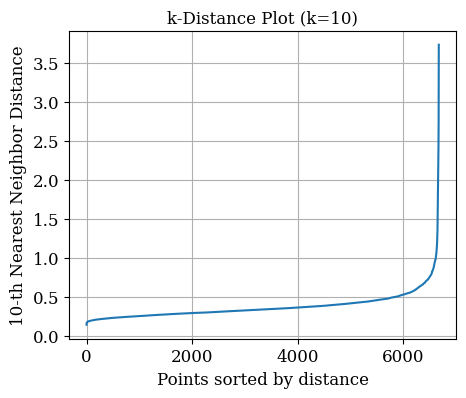

In [189]:
from sklearn.neighbors import NearestNeighbors

# Assuming normalized_principal_components is already defined
# choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).
k = 2 * 5

# Compute the k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(normalized_principal_components)
distances, indices = nbrs.kneighbors(normalized_principal_components)

# Sort the distances (distances are in ascending order for each point, so we take the k-th distance)
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(5, 4))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title(f'k-Distance Plot (k={k})')
plt.grid(True)
plt.savefig(parent_dir + 'PCA_stuff/' + 'k-distance-plot.png')

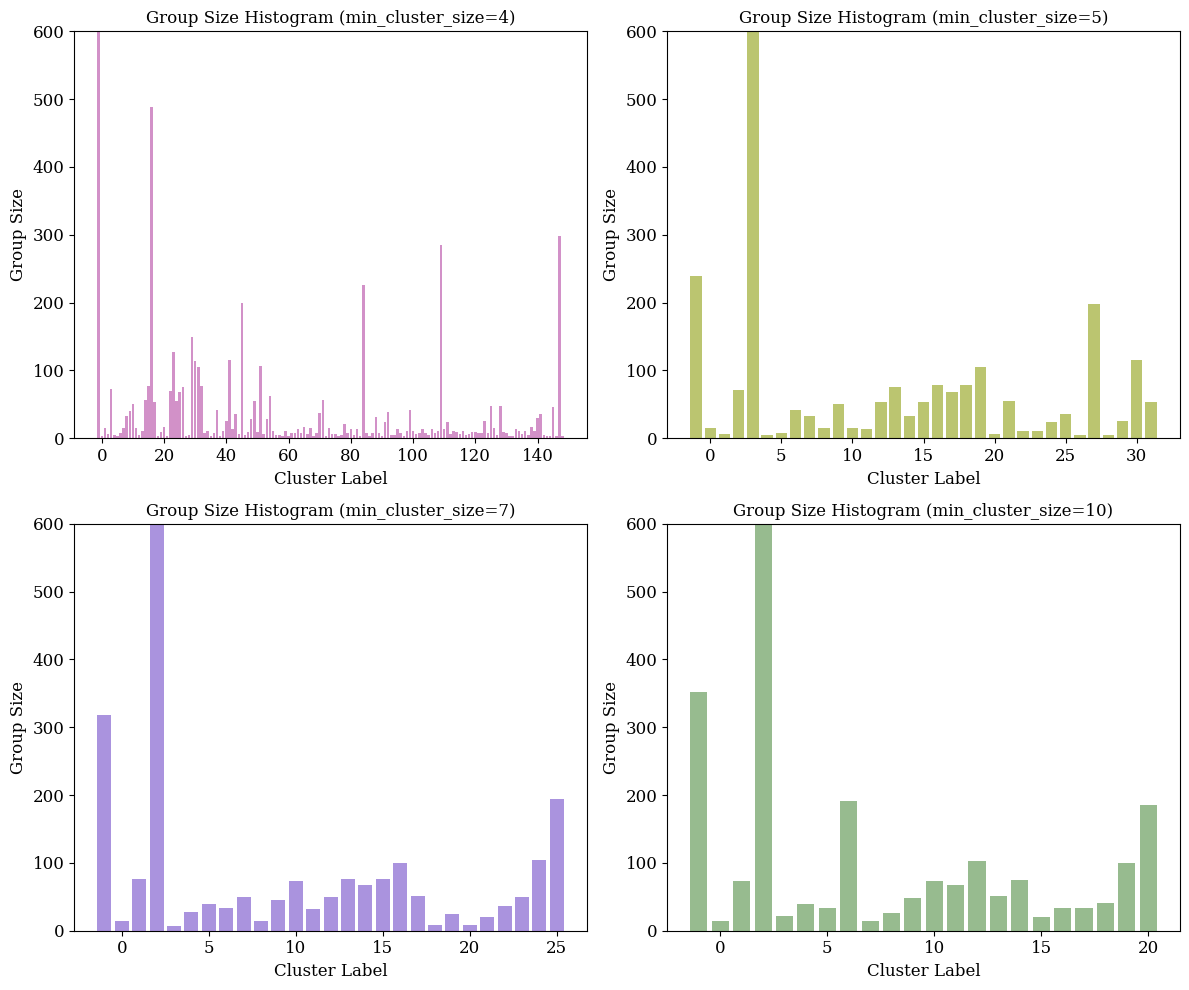

In [190]:

# Assuming normalized_principal_components is already defined
cluster_size = [4, 5, 7, 10]


# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, size in enumerate(cluster_size):
    # Run HDBSCAN with varying cluster_selection_epsilon
    hdbscan = HDBSCAN(min_cluster_size=size, allow_single_cluster=True).fit(
        normalized_principal_components)
    hdbscan_labels = hdbscan.labels_

    # Plot histogram for the current cluster_selection_epsilon
    unique, counts = np.unique(hdbscan_labels, return_counts=True)
    row, col = divmod(i, 2)
    axes[row, col].bar(unique, counts, color=colors[i], alpha=0.7)
    axes[row, col].set_xlabel('Cluster Label')
    axes[row, col].set_ylabel('Group Size')
    axes[row, col].set_title(f'Group Size Histogram (min_cluster_size={size})')
    # axes[row, col].set_xticks([])
    axes[row, col].set_ylim([0, 600])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(parent_dir + 'PCA_stuff/' + 'HDBSCAN_clusters_size.png')

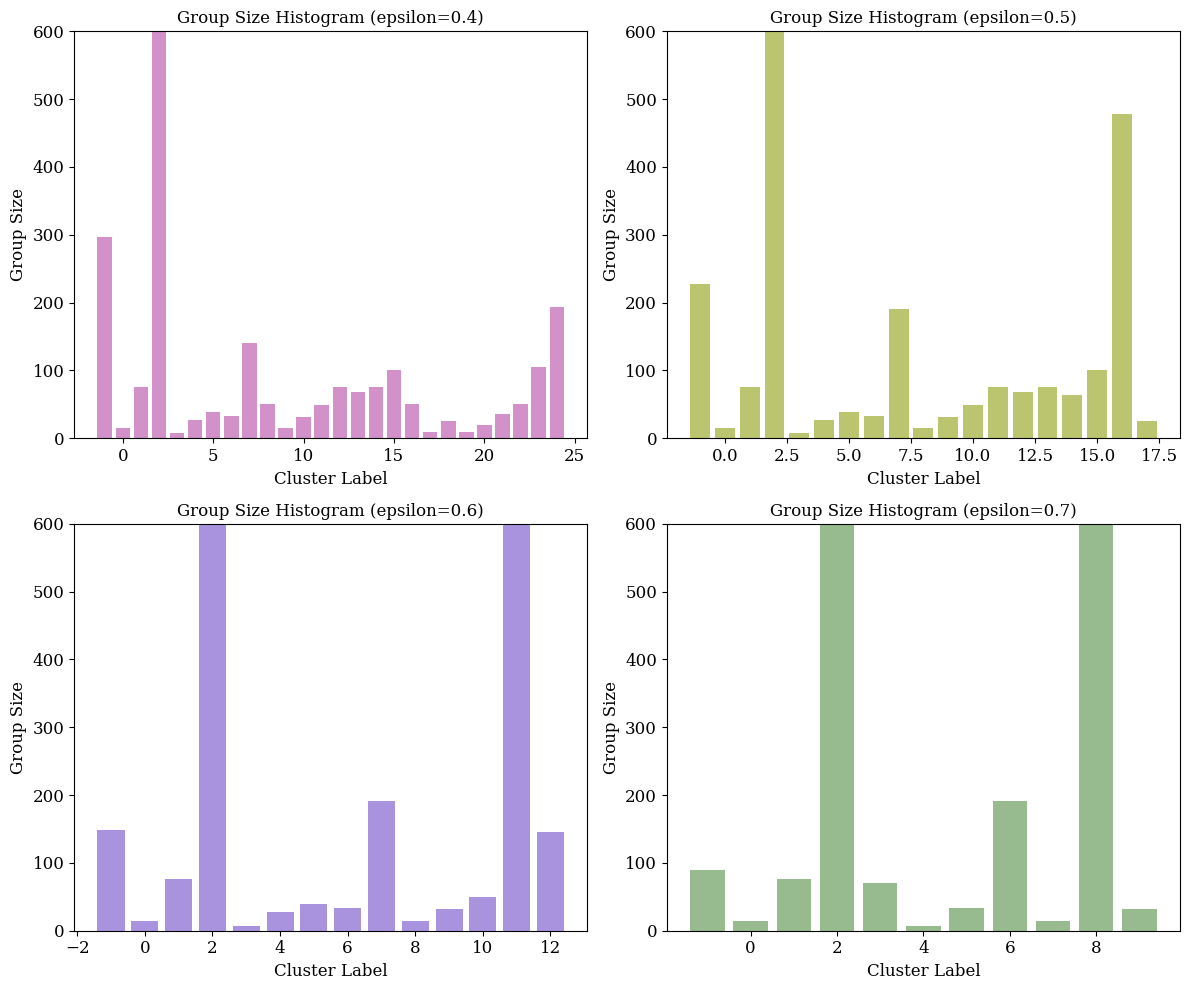

In [191]:

# Assuming normalized_principal_components is already defined
eps_values = [0.4, 0.5, .6, .7]


# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, eps in enumerate(eps_values):
    # Run HDBSCAN with varying cluster_selection_epsilon
    hdbscan = HDBSCAN(min_cluster_size=7, cluster_selection_epsilon=eps,
                      allow_single_cluster=True).fit(normalized_principal_components)
    hdbscan_labels = hdbscan.labels_

    # Plot histogram for the current cluster_selection_epsilon
    unique, counts = np.unique(hdbscan_labels, return_counts=True)
    row, col = divmod(i, 2)
    axes[row, col].bar(unique, counts, color=colors[i], alpha=0.7)
    axes[row, col].set_xlabel('Cluster Label')
    axes[row, col].set_ylabel('Group Size')
    axes[row, col].set_title(f'Group Size Histogram (epsilon={eps})')
    axes[row, col].set_ylim([0, 600])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(parent_dir + 'PCA_stuff/' + 'HDBSCAN_epsilon_variation.png')

In [192]:
hdbscan_best = HDBSCAN(min_cluster_size=7, cluster_selection_epsilon=0.4,
                       allow_single_cluster=True).fit(normalized_principal_components)
final_labels = hdbscan_best.labels_

<BarContainer object of 26 artists>

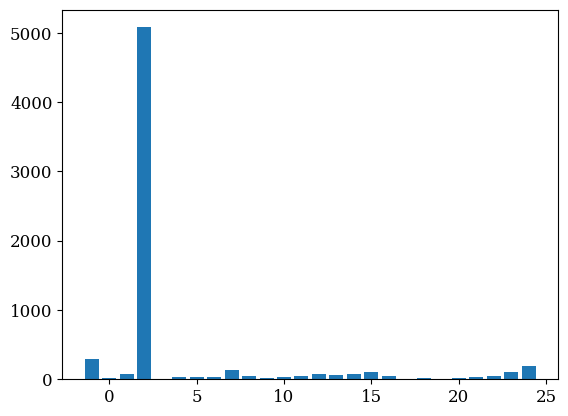

In [193]:
unique, counts = np.unique(final_labels, return_counts=True)
plt.bar(unique, counts)

In [194]:

np.savetxt(parent_dir+'/PCA_stuff/'+'final_labels.csv',
           final_labels, delimiter=',', fmt='%d')

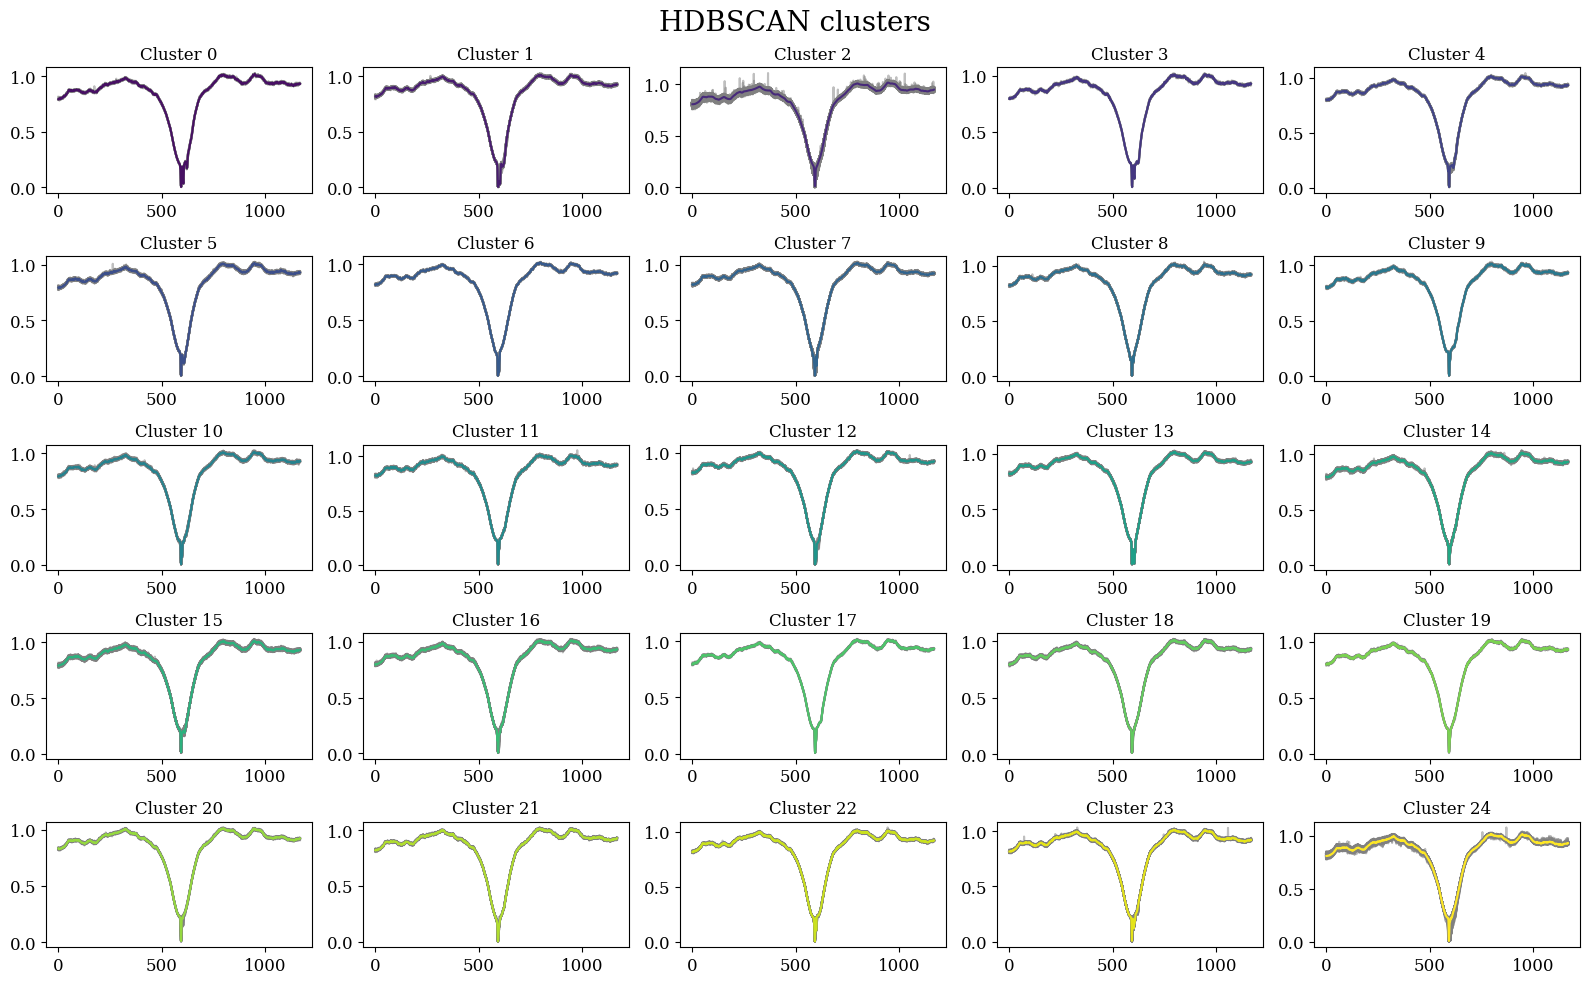

In [195]:
n_clusters = max(final_labels) + 1

# Create a figure with three subplots
fig, axes = plt.subplots(5, 5, figsize=(16, 10))

# axes is a list of three Axes objects
axes_list = [axes[i//5, i % 5] for i in range(n_clusters)]


colors = ["#ca5670", "#72a555", "#ab62c0", "#c57c3c", "#638ccc"]

for index, row in df_reset.iterrows():
    label = final_labels[index]
    color = plt.cm.viridis((label) / n_clusters)
    axes_list[label].plot(row, alpha=0.5, color='grey')

for label in (range(n_clusters)):
    # Select rows corresponding to the current label
    label_rows = df_reset[final_labels == label]

    # Calculate the average of each row
    median_row = label_rows.median(axis=0)

    color = plt.cm.viridis((label + 1) / n_clusters)

    # Plot the average row
    axes_list[label].plot(median_row, color=color)
    axes_list[label].set_title(f'Cluster {label}')

fig.suptitle('HDBSCAN clusters', fontsize=20)
plt.tight_layout()
plt.savefig(parent_dir+'PCA_stuff/'+'HDBSCAN_plot_clusters.png')

In [196]:
unique, counts

sorted_indices = np.argsort(counts[1:])
counts[1:][sorted_indices[-1]]

5078

3
17
19
0
9
20
18
4
10
6
21
5
11
8
22
16
13
12
14
1
15
23
7
24
2


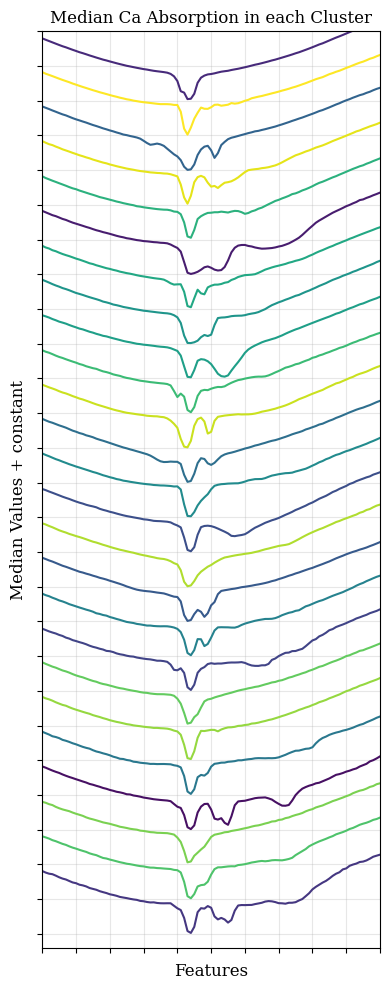

In [197]:
# Create a figure with subplots for each label
fig, ax = plt.subplots(figsize=(4, 10))
n_clusters = max(final_labels) + 1
# Calculate and plot the average of each row per label
for n, index in enumerate(sorted_indices):
    # Select rows corresponding to the current label
    label = unique[1:][index]
    print(label)
    label_rows = df_reset[final_labels == label]

    # Calculate the average of each row
    median_row = label_rows.median(axis=0)

    color = plt.cm.viridis((label + 1) / n_clusters)

    # Plot the average row
    ax.plot(median_row + (.25 * n), color=color)
ax.set_title('Median Ca Absorption in each Cluster')
ax.set_xlabel('Features')
ax.set_ylabel('Median Values + constant')
# Remove x and y ticks

ax.grid(True, alpha =.3)
ax.set_xticks(np.arange(550, 651, 10))  # Adjust the range and step as needed
ax.set_yticks(np.arange(0, 6.6, .25))  # Adjust the range and step as needed
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.xlim(550, 650)
plt.ylim(-.1, 6.5)
plt.tight_layout()
plt.savefig(parent_dir + 'PCA_stuff/' + 'HDBSCAN_cluster_lines.png')

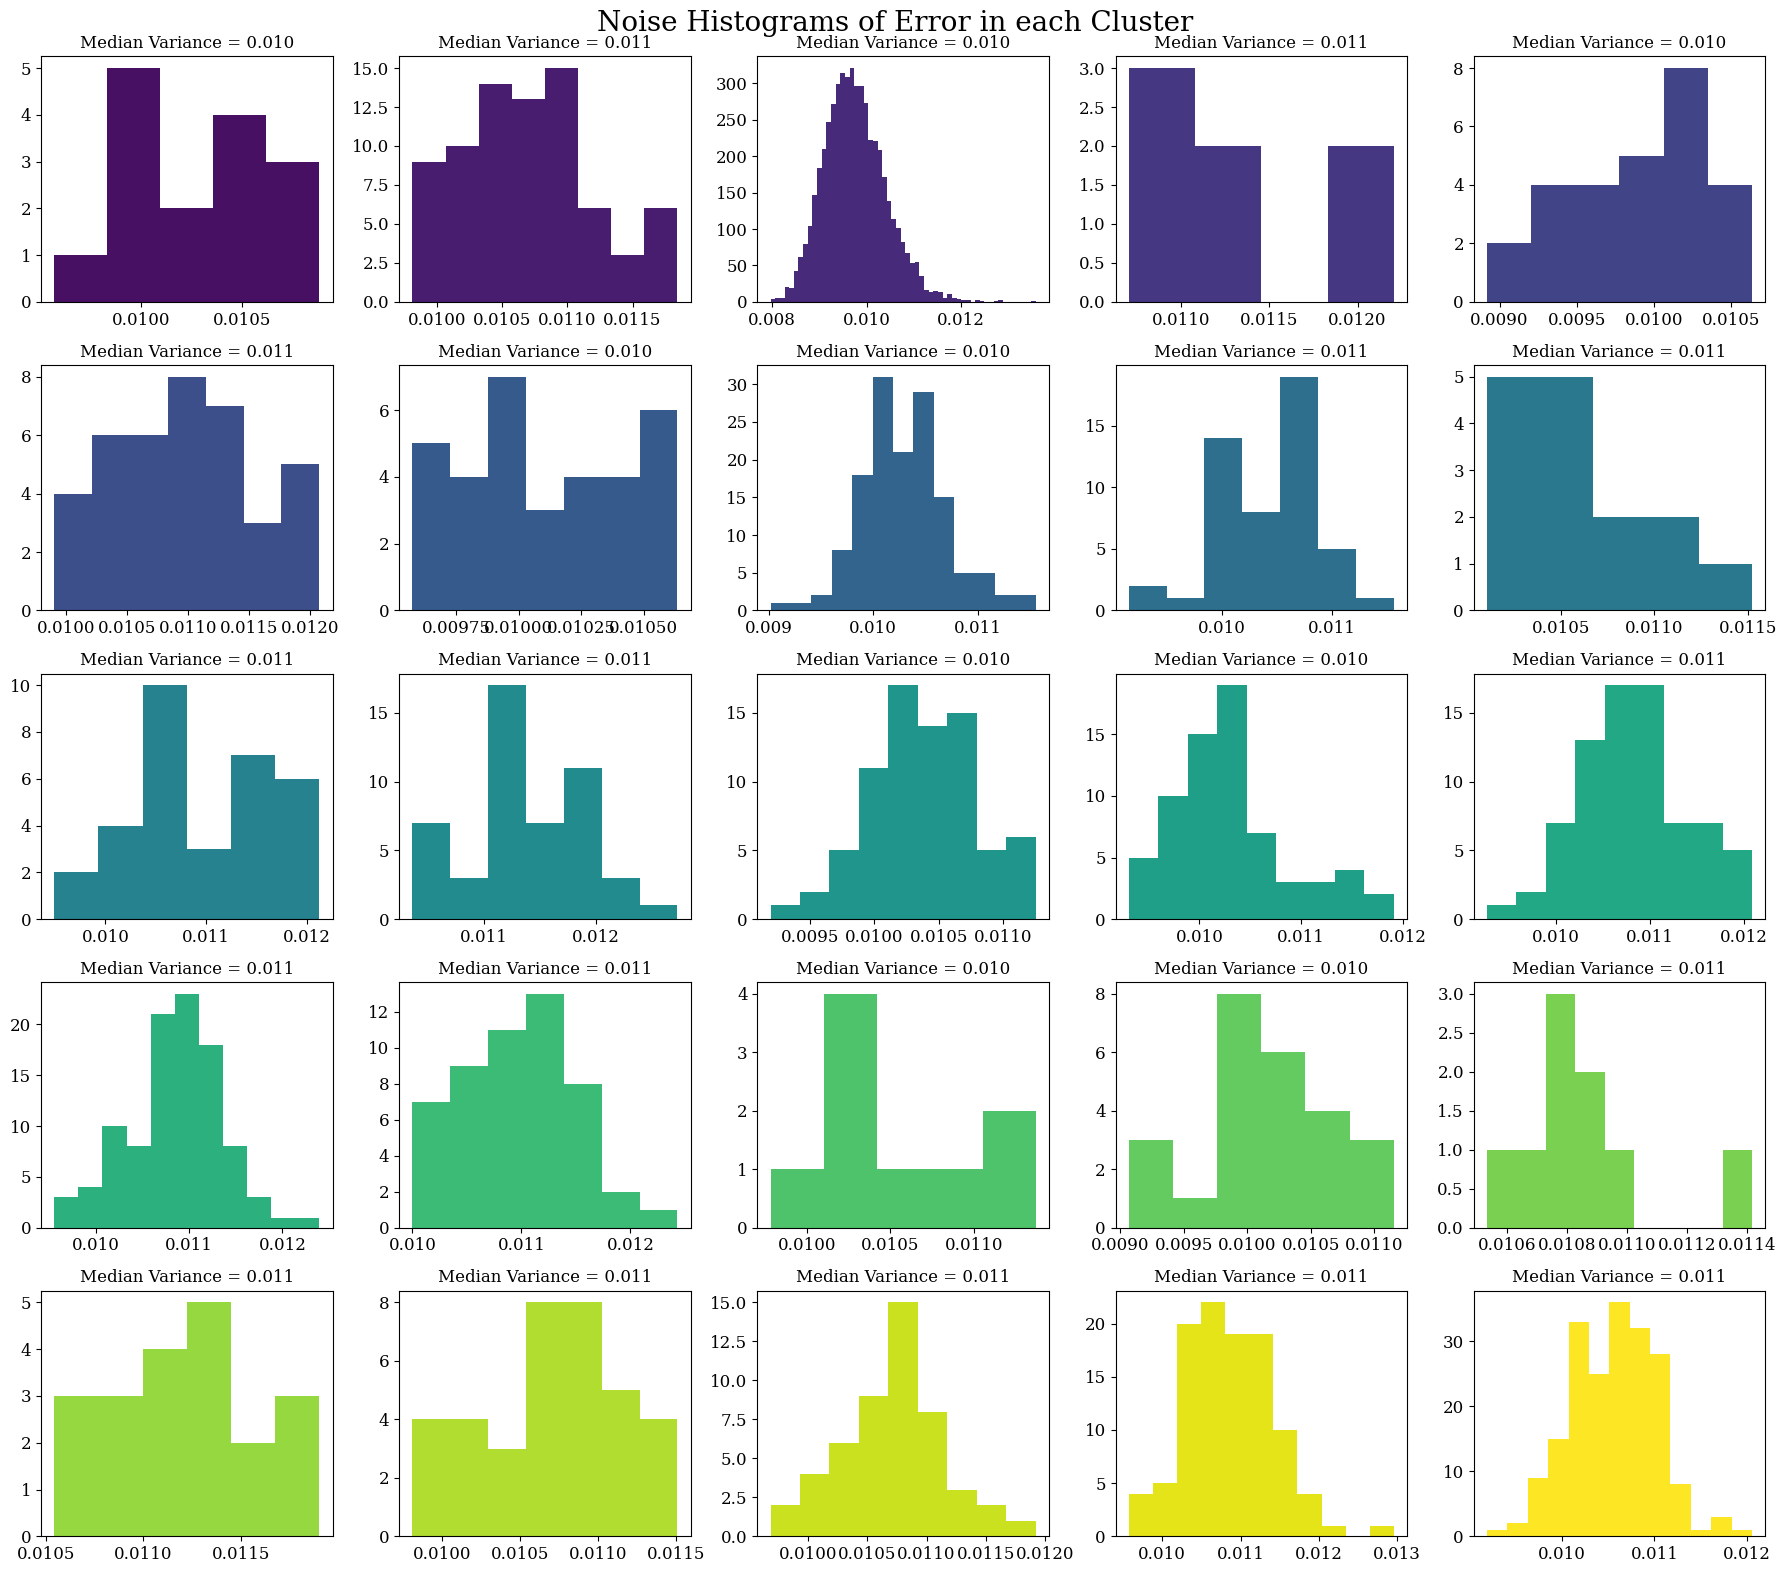

In [198]:
# Assuming df_reset and final_labels are already defined
n_clusters = max(final_labels) + 1

# Function to calculate RMS of the last 100 data points


def calculate_rms(row):
    return np.std(row[-100:])


# Calculate RMS for each row
variance_list = df_reset.apply(calculate_rms, axis=1)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(18, 16))

# axes is a list of Axes objects
axes_list = [axes[i // 5, i % 5] for i in range(n_clusters)]

colors = ["#ca5670", "#72a555", "#ab62c0", "#c57c3c", "#638ccc"]

for label in range(n_clusters):
    # Select RMS values corresponding to the current label
    label_rms = variance_list[final_labels == label]
    median_rms = label_rms.median()
    # Plot histogram of RMS values
    color = plt.cm.viridis((label + 1) / n_clusters)
    axes_list[label].hist(label_rms, color=color, bins='auto')
    axes_list[label].set_title(f'Median Variance = {median_rms:.3f}')


fig.suptitle('Noise Histograms of Error in each Cluster', fontsize = 20)
plt.tight_layout()
plt.savefig(parent_dir + 'PCA_stuff/' + 'RMS_histograms_clusters.png')
plt.show()

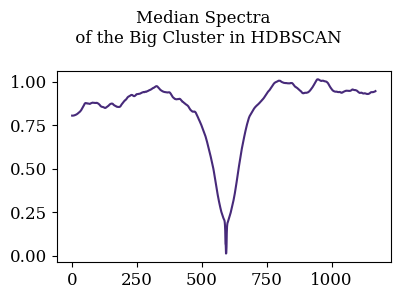

In [199]:
label = unique[1:][sorted_indices[-1]]
fig, ax = plt.subplots(figsize=(4, 3))
# Select rows corresponding to the current label
label_rows = df_reset[final_labels == label]

# for index, row in df_reset.iterrows():
#     if label == final_labels[index]:
#         ax.plot(row, alpha=0.5, color='grey')

# Calculate the average of each row
median_row = label_rows.median(axis=0)

color = plt.cm.viridis((label + 1) / n_clusters)

# Plot the average row
ax.plot(median_row, color=color)

fig.suptitle('Median Spectra \n of the Big Cluster in HDBSCAN', fontsize=12)
plt.tight_layout()
plt.savefig(parent_dir+'PCA_stuff/'+'HDBSCAN_plot_clusters.png')